# Transpiler Benchmarks

This notebook takes benchmark results and plots them.

## Dependencies
You'll need a valid rust installation, `node` and `pnpm` installed. You can get
`pnpm` by running `corepack enable`.

You'll also need the following pythong dependencies:
- `pandas`
- `matplotlib`
- `numpy`



## Instructions
Before running this notebook, run the benchmarks by running
```sh
cargo run
```
Then, start a Jupyter Notebook session, open this notebook, and click the `Run All` button.

In [1]:
# Build a CSV file containing the benchmark data
!pnpm install
!pnpm table --format csv --output transpiler-benchmark.csv

Lockfile is up to date, resolution step is skipped
Already up to date
Done in 234ms

> bench-javascript-transformer-written-in-rust@1.0.0 table /Users/donisaac/Documents/projects/experiments/rust-workspace/oxc/bench-javascript-transformer-written-in-rust
> node table.mjs "--format" "csv" "--output" "transpiler-benchmark.csv"

(node:88324) ExperimentalWarning: Importing JSON modules is an experimental feature and might change at any time
(Use `node --trace-warnings ...` to show where the warning was created)
Saved table to transpiler-benchmark.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load benchmark data into a pandas dataframe
df = pd.read_csv('transpiler-benchmark.csv')
df.head()

,group,bench_name,tool,measurement,duration_ms
0,cal.com.tsx,no-drop,oxc,duration,11.722207
1,cal.com.tsx,parallel,oxc,duration,22.114581
2,cal.com.tsx,single-thread,oxc,duration,11.723582
3,cal.com.tsx,no-drop,swc,duration,34.366857
4,cal.com.tsx,parallel,swc,duration,69.552646


In [4]:
# drop measurement column. It's always "duration" for now.
df = df.drop(columns=['measurement'])

# make duration_ms a numeric column
df['duration_ms'] = pd.to_numeric(df['duration_ms'])

# make bench_name, group, and tool categorical columns
df['bench_name'] = df['bench_name'].astype('category')
df['group'] = df['group'].astype('category')
df['tool'] = df['tool'].astype('category')

df.head()

,group,bench_name,tool,duration_ms
0,cal.com.tsx,no-drop,oxc,11.722207
1,cal.com.tsx,parallel,oxc,22.114581
2,cal.com.tsx,single-thread,oxc,11.723582
3,cal.com.tsx,no-drop,swc,34.366857
4,cal.com.tsx,parallel,swc,69.552646


In [5]:
x_axis = df['group'].unique()

# average duration over bench_name where tool='oxc'
oxc_results = df[df['tool'] == 'oxc'].groupby(['group'])['duration_ms'].mean()
# same for swc
swc_results = df[df['tool'] == 'swc'].groupby(['group'])['duration_ms'].mean()

oxc_results

group
cal.com.tsx       15.186790
typescript.js    102.910927
Name: duration_ms, dtype: float64

findfont: Font family ['OpenSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['OpenSans'] not found. Falling back to DejaVu Sans.


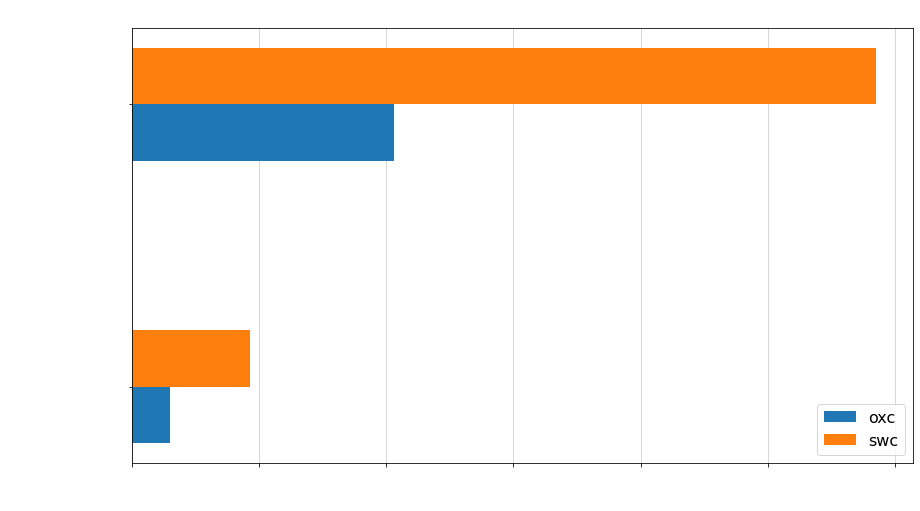

In [7]:
# Configure MPL to make the plot look nice
plt.rc('font', family='OpenSans', size=16)

# Configures label/title/etc. colors. Set to False for light mode
dark_mode = True
color = 'white' if dark_mode else 'black'

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
width = 0.2
y_pos = np.arange(len(x_axis))

bar1 = ax.barh(y_pos - width/2, oxc_results, width, label='oxc')
bar2 = ax.barh(y_pos + width/2, swc_results, width, label='swc')

# add labels
# our slides are dark, so we need to invert label/title/etc colors
ax.set_xlabel('Duration (ms)', color=color)
ax.set_ylabel('Transpiled File Name', color=color)
ax.set_title('Transpiler Performance (Apple M1 Macbook Pro)', color=color)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_axis)

# Set label and tick colors
for axis in [ax.xaxis, ax.yaxis]:
    axis.label.set_color(color)
    axis.set_tick_params(labelcolor=color)

# Add light grey vertical bars. Make sure they don't cross over the bars
# themselves
ax.set_axisbelow(True)
ax.xaxis.grid(True, color="#CCCCCC")

ax.legend()

plt.show()